# IPython, Numpy, Scipy and Matplotlib Tutorial

#### Prepared by Nick Leiby and Daniel Newman 

#### Git repo available at https://dtnewman2@bitbucket.org/dtnewman2/ipython_tutorial.git
#### Note: You may need to run "brew install freetype" before installing the requirements with pip

## I. Setup

First let's import all of the libraries we'll be using:

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import string
from scipy import weave
import scipy.weave.inline_tools as inline_tools


The following code is necessary to make sure that your graphs appear inline in the notebook:

In [3]:
%matplotlib inline

So how does iPython work?  Under the hood: https://ipython.org/ipython-doc/dev/development/how_ipython_works.html 

Above the hood: interactive python shell, with persistent memory.  The order of cell execution is indicated to the left of the cell.  


In [7]:
print a

4


In [8]:
a = 4

In [9]:
print a


4


In [10]:
a = 2
print a

2


In [13]:
for i in range(1, 101):
    if (i % 3 == 0) and (i % 5 == 0):
        print i, 'FizzBuzz'
    elif i % 3 == 0:
        print i, 'Fuzz'
    elif i % 5 == 0:
        print i, 'Buzz'
    else:
        print i


1
2
3 Fuzz
4
5 Buzz
6 Fuzz
7
8
9 Fuzz
10 Buzz
11
12 Fuzz
13
14
15 FizzBuzz
16
17
18 Fuzz
19
20 Buzz
21 Fuzz
22
23
24 Fuzz
25 Buzz
26
27 Fuzz
28
29
30 FizzBuzz
31
32
33 Fuzz
34
35 Buzz
36 Fuzz
37
38
39 Fuzz
40 Buzz
41
42 Fuzz
43
44
45 FizzBuzz
46
47
48 Fuzz
49
50 Buzz
51 Fuzz
52
53
54 Fuzz
55 Buzz
56
57 Fuzz
58
59
60 FizzBuzz
61
62
63 Fuzz
64
65 Buzz
66 Fuzz
67
68
69 Fuzz
70 Buzz
71
72 Fuzz
73
74
75 FizzBuzz
76
77
78 Fuzz
79
80 Buzz
81 Fuzz
82
83
84 Fuzz
85 Buzz
86
87 Fuzz
88
89
90 FizzBuzz
91
92
93 Fuzz
94
95 Buzz
96 Fuzz
97
98
99 Fuzz
100 Buzz


## II. Numpy

The Numpy (which stands for "Numeric Python") library is often used in areas such as applied mathematics and scientific computing. It extends the Python language to provide support for arrays (single and multi-dimensional) and matrices. If you are familiar with Matlab, then the syntax and common usage of Numpy will probably look familiar to you. Numpy has the advantage of being much faster than standard python for most calculations that use arrays (compared to using lists or other data structures native to Python).

#### Why is Numpy faster than Python?

Let's start out by discussing why Python is slow. Here are a few reasons <sup>[1](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/ "Why Python is Slow: Looking Under the Hood") </sup>:

* **Python is dynamically typed - ** In a statically typed language, variables are of a specific type (int, char, etc.). In dynamically typed languages such as Python, the interpreter must figure out what kind of object each variable is holding at execution. So for example, before two integers are added together in Python, the interpreter first needs to check if the objects are integers that *can* be added together. In statically typed languages, the variable types are known, so this isn't an issue.
* **Interpreted languages can't be optimized as well as compiled languages -** A well written compiler can find things such as unnecessary or repeated operations during compilation and make the code run faster during execution as a result.
* **Inefficient memory access - ** In Python, we commonly use lists to store what would normally be put into arrays in other languages. However, lists in Python don't hold data. Rather, they hold a contiguous buffer of *pointers* to data. The following diagram shows what this looks like: <img src="images/PythonList.png">Alternatively, in a statically typed language such as C, an array points directly to a contiguous data buffer of values.

Much of the code in Numpy simply uses Pyton to wrap precompiled libraries written in Fortran and C. So Numpy gets to take advantage of things such as dynamic typing, compilation and efficient memory access. When you look at the diagram below, you can see how a Numpy array uses a much simpler (and quicker to access) scheme to store data:
<img src="images/NumpyArray.png">

### Example 1 - Means of lists and arrays

Let's do a simple example. We'll create a list of integers and a numpy array of integers with 10 million values in each. Then we'll grab the average values from these two arrays. First we initialize the list and the array:

In [14]:
size = 10**6
rand_int_list = [random.randint(0,100) for x in range(size)]
rand_int_array = np.random.randint(101, size=size)

That took a while to run. Let's see how long it takes to run each of the lines above. Luckily, iPython has a convenient 'timeit' feature that we can use to see how long a piece of code takes to run. This feature will automatically run the code multiple times and give you the average.

In [17]:
%%timeit
# TIME PYTHON VERSION
rand_int_list = [random.randint(0,100) for x in xrange(size)]

1 loops, best of 3: 1.32 s per loop


In [16]:
%%timeit
# TIME NUMPY VERSION
rand_int_array = np.random.randint(101, size=size)

100 loops, best of 3: 13.6 ms per loop


As you can see, initializing a numpy array of this size is a *much* quicker process than constructing the python list. Let's just verify that the list and array created above are roughly equal in their relevant characteristics:

In [18]:
# PRINT STATISTICS FOR LIST AND ARRAY
print 'List length:  %s' % len(rand_int_list)
print 'Array length: %s' % len(rand_int_array)
print 'List average value:  %s' %  (sum(rand_int_list) / float(len(rand_int_list)))
print 'Array average value: %s' % np.mean(rand_int_array)

List length:  1000000
Array length: 1000000
List average value:  49.987712
Array average value: 49.964373


Let's take a look at how long it takes to calculate the average of the list in Python:

In [19]:
%%timeit
# TIMER FOR CALCULATING AVERAGE (PYTHON)
sum(rand_int_list) / float(len(rand_int_list))

100 loops, best of 3: 6.51 ms per loop


As an aside, the above calculation is a bit simpler in Python 3, or if you import Python 3 division into Python 2, as follows:

In [20]:
# USING PYTHON 3 STYLE DIVISION
from __future__ import division
sum(rand_int_list) / len(rand_int_list)

49.987712

And now let's compare the timing when we use Numpy to get the average of the array:

In [24]:
%%timeit
# TIMER FOR CALCULATING AVERAGE (NUMPY)
np.sum(rand_int_array)/np.size(rand_int_array)

1000 loops, best of 3: 660 µs per loop


In [25]:
%%timeit
# TIMER FOR CALCULATING AVERAGE (NUMPY)
np.mean(rand_int_array)

1000 loops, best of 3: 1.56 ms per loop


### Example 2 - Monte Carlo simulations for the size of a circle

Imagine that you want to calculate the area of a shape. For simplicity, we'll assume a simple shape such as a circle with radius 5m. Below we use matplotlib to plot out this circle:

In [26]:
# SETTINGS FOR CIRCLE PROBLEM
radius = 5.0
box_size = 20.0
box_area = box_size * box_size

In [27]:
# CODE TO PLOT A SIMPLE CIRCLE
def plot_circle():
    x = np.linspace(-radius, radius, num=1000) # get 1000 evenly spaced points on the x axis
    y = np.sqrt(radius**2-x**2) # use the formula of a circle to get 1000 y-axis points
    
    plt.ylim([-box_size/2,box_size/2]) # set the plot limit on the y-axis
    plt.xlim([-box_size/2,box_size/2]) # set the plot limit on the x-axis
    plt.plot(x, y, color='y') # plot the upper half of the circle
    plt.plot(x, -y, color='y') # plot the lower half of the circle
    
plt.figure(figsize=[8,8])
plot_circle()
plt.show()

Now we know that a circle's area can be calculated with the equation $A = \pi r^2$. But for learning's sake, let's pretend that we don't know what the value of $/pi$ is beyond a few decimals, so it won't be of much use to us. So instead, we'll use Monte Carlo simulations to determine the area of this circle. While Monte Carlo methods can get very complicated, what we are going to do is actually surprisingly simple. Since we know the radius of our circle, we can draw an imaginary box around the circle. For a circle with a 5m radius, the box will need to be 10x10, therefore having an area of 100. Next, we'll generate a large number of random points inside of the box and using the Pythagorean Theorem (a.k.a  $a^2+b^2=c^2$), we'll check if these points are inside of the circle's radius. Now, given $x$, $y$ and $S$ where $x$ is the number of points that fall inside the circle, $y$ is the total number of points and $S$ is the area of the square, then:

Area of circle $=\frac{x}{y} \times S$, as $ y\to\infty$

Let's calculate this using standard Python:

In [28]:
actual_circle_size = np.pi*radius**2 # calculate the actual circle size
sample_size = 1000 # pick a small sample size to start out with

# finds if a point (x,y) is inside the circle
euclidean_distance = lambda x, y: (x**2 + y**2)**0.5
inside_circle = lambda x, y: True if euclidean_distance(x, y) < radius else False

In [30]:
# take a random sample for both axes
x = [random.uniform(-box_size/2, box_size/2) for elem in xrange(sample_size)]
y = [random.uniform(-box_size/2, box_size/2) for elem in range(sample_size)]

x_inside = [] # will store all x values of points that are found to be inside of the circle
y_inside = [] # will store all y values of points that are found to be inside of the circle
x_outside = [] # will store all x values of points that are found to be outside of the circle
y_outside = [] # will store all y values of points that are found to be outside of the circle

# loop through 1000 times
for i in xrange(sample_size):
    if inside_circle(x[i], y[i]):
        x_inside.append(x[i])
        y_inside.append(y[i])
    else:
        x_outside.append(x[i])
        y_outside.append(y[i])

print "Actual circle size: %sm^2" % actual_circle_size
print "Approximated circle size: %sm^2" % (len(x_inside)/float(sample_size)*box_area)

Actual circle size: 78.5398163397m^2
Approximated circle size: 75.2m^2


In the code above, we used a sample size of 100. This sample size is not nearly large enough to accurately calculate the circle's area. Below, you can see a figure of the sample points. Sample points inside the circle are shown in red and points outside the circle are shown in blue.

In [31]:
# PLOT THE SIMULATION DONE ABOVE
plt.figure(figsize=[8,8])        
plt.scatter(x_inside, y_inside, c='red', edgecolor='none') # plot the points inside the circle in red
plt.scatter(x_outside, y_outside, c='blue', edgecolor='none') # plot the points outside the circle in blue
plot_circle()
plt.show()

Now, let's use a large sample size (10 million) to get a better approximation:

In [32]:
sample_size = 10**7

In [33]:
t0 = time.time()

# take a random sample for both axes
x = [random.uniform(-box_size/2, box_size/2) for elem in xrange(sample_size)]
y = [random.uniform(-box_size/2, box_size/2) for elem in xrange(sample_size)]

sum_inside = 0

for i in xrange(sample_size):
    if inside_circle(x[i], y[i]):
        sum_inside += 1

calculated_size = sum_inside/float(sample_size)*box_area


t1 = time.time()
total_time_1 = t1-t0
print "Time: %s seconds" % round(total_time_1,3)
print "Actual circle size: %sm" % actual_circle_size
print "Approximated circle size: %sm" % calculated_size

Time: 19.116 seconds
Actual circle size: 78.5398163397m
Approximated circle size: 78.54744m


This took a while to run. Let's see if we can speed it up with Numpy:

In [36]:
t0 = time.time()

# take a random sample for both axes
x = np.random.uniform(-box_size/2, box_size/2, sample_size)
y = np.random.uniform(-box_size/2, box_size/2, sample_size)

z = euclidean_distance(x, y)

calculated_size = (z < radius).sum()/float(sample_size)*box_area


t1 = time.time()
total_time_2 = t1-t0
print "Time: %s seconds" % round(total_time_2,3)
print "Actual circle size: %sm" % actual_circle_size
print "Calculated circle size: %sm" % calculated_size 

Time: 0.505 seconds
Actual circle size: 78.5398163397m
Calculated circle size: 78.4516m


In [35]:
print "The numpy implementation ran %s times faster!" % round(total_time_1/total_time_2,1)

The numpy implementation ran 26.6 times faster!


## III. Scipy

Scipy is an open source library of tools for scientific computing. The library is meant to have functionality similar to tools such as Matlab. We will only be (briefly) discussing the weave subpackage, but the following is a list of the various packages included in Scipy:

* cluster - Clustering algorithms
* constants - Physical and mathematical constants
* fftpack - Fast Fourier Transform routines
* integrate - Integration and ordinary differential equation solvers
* interpolate - Interpolation and smoothing splines
* io - Input and Output
* linalg - Linear algebra
* ndimage - N-dimensional image processing
* odr - Orthogonal distance regression
* optimize - Optimization and root-finding routines
* signal - Signal processing
* sparse - Sparse matrices and associated routines
* spatial - Spatial data structures and algorithms
* special - Special functions
* stats - Statistical distributions and functions
* weave - C/C++ integration

### Weave

Weave is a library that is part of the Scipy project for embedding C/C++ code into Python. We'll illustrate with another example below in which we'll use Weave to run the same monte carlo simulations that we ran above.

In [37]:
# MONTE CARLO CIRCLE PROBLEM USING WEAVE
def monte_carlo_cplusplus(sample_size, radius, x, y):        
    """Uses C++ code to approximate the area of a circle with monte carlo simulations""" 
    
    code = """
           #include <math.h>
           
           double euclidean_dist;
           int count_inside = 0;
           for (int i = 0; i < sample_size; i++) {
               if (sqrt(x[i]*x[i] + y[i]*y[i]) < radius) {
                   count_inside++;
               }
           }
           return_val = count_inside/(double) sample_size;
           """
    return weave.inline(code, ['sample_size', 'x', 'y', 'radius'])

In [38]:
# let it run once first to compile the code
x = np.random.uniform(-radius, radius, sample_size)
y = np.random.uniform(-radius, radius, sample_size)
calculated_size = monte_carlo_cplusplus(sample_size, radius, x, y)

# now run it again and time it
t0 = time.time()
x = np.random.uniform(-radius, radius, sample_size)
y = np.random.uniform(-radius, radius, sample_size)
calculated_size = monte_carlo_cplusplus(sample_size, radius, x, y)


t1 = time.time()
total_time_3 = t1-t0
print "Time: %s seconds" % round(total_time_3,5)
print "Actual circle size: %sm" % actual_circle_size
print "Calculated circle size: %sm" % calculated_size

Time: 0.35193 seconds
Actual circle size: 78.5398163397m
Calculated circle size: 0.7854809m


In [39]:
print "The Weave (C++) implementation ran %s times faster!" % round(total_time_1/total_time_3,1)

The Weave (C++) implementation ran 54.3 times faster!


### Example 3: Anagrams

In [40]:
# THE ANAGRAMS INTERVIEW QUESTION IN PLAIN PYTHON
def anagrams(word_list):
    anagram_dict = {}
    for word in word_list:
        sorted_word = ''.join(sorted(word))
        if not sorted_word in anagram_dict:
            anagram_dict[sorted_word] = 0
        anagram_dict[sorted_word] += 1

    count = 0
    for value in anagram_dict.itervalues():
        if value > 1:
            count += value
    return count

In [41]:
# GENERATE A LARGE LIST OF RANDOM WORDS
word_list = []
WORD_LIST_SIZE = 10**6
for i in range(WORD_LIST_SIZE):
    # append a random word of length 9 or 10
    word_list.append(''.join(random.choice(string.ascii_uppercase) for _ in range(random.randint(9,10))))

In [42]:
# TIME THE PYTHON IMPLEMENTATION
t0 = time.time()
print "Number of anagrams: ", anagrams(word_list)
t1 = time.time()
total_time_1 = t1-t0
print "Time: %s seconds" % round(total_time_1,3)

Number of anagrams:  10741
Time: 2.636 seconds


Now let's do this with Weave:

In [43]:
# IMPLEMENT THE FUNCTION IN C++ AND INTEGRATE WITH WEAVE
def anagrams_c_plus_plus(word_list):
    code = """
           #include <string>
           #include <algorithm>
       
           py::dict anagram_dict;
           int count = 0;
           for (int i = 0; i < word_list.size(); i++) {
               std::string word = word_list[i];
               std::sort(word.begin(), word.end());
               if (!anagram_dict.has_key(word)) {
                   anagram_dict[word] = 1;
               } else {
                   anagram_dict[word] = (int)anagram_dict[word] + 1;
                   if (anagram_dict[word] == 2) {
                       count++;
                   } 
                   count++;
               }       
           }
           return_val = count;
           """
    return inline_tools.inline(code, ['word_list'], verbose=1)

In [44]:
# let it run once first to compile the code
anagrams_c_plus_plus(word_list)

t0 = time.time()
print "Number of anagrams: ", anagrams_c_plus_plus(word_list)
t1 = time.time()
total_time_2 = t1-t0
print "Time: %s seconds" % round(total_time_2,3)

Number of anagrams:  10741
Time: 0.932 seconds


In [45]:
print "The Weave (C++) implementation ran %s times faster!" % round(total_time_1/total_time_2,1)

The Weave (C++) implementation ran 2.8 times faster!


## IV. Matplotlib: Pyplot

### (non) Option 1: Matlab-like API

Matplotlib was built to mimic the behaviour of Matlab, and so you can run a number of commands intended to mimic the Matlab IDE interface.  However, this is really only useful for the simplest of graphs. 

In [46]:
x = np.arange(0., 5., 0.2)
y = x**2

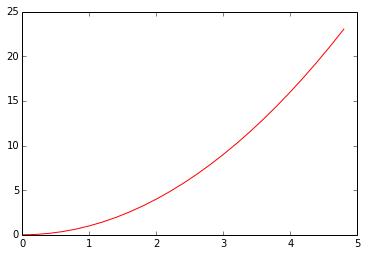

In [47]:
from pylab import *
figure()
plot(x, y, 'r')
show()

### Option 2: Object-oriented plotting

A better way to interact with matplotlib is via its object-oriented api.  It sometimes involves a few more lines of code for the simplest of graphs, but it's more explicit about assignments (does away with global a 'figure' instance) and allows finer-grained control of the figure properties.

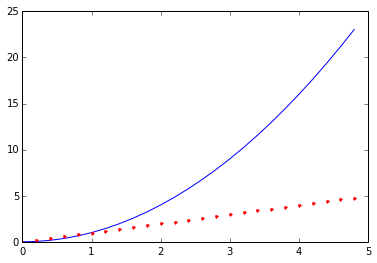

In [50]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
# plot is often used with shorthand arguments
axes.plot(x,y) # required args are x and y
axes.plot(x, sqrt(y), 'r-') # optional format string arg allows plot formatting
plt.show()

There are many keyword arguments that you can use to specify how you want your chart to look

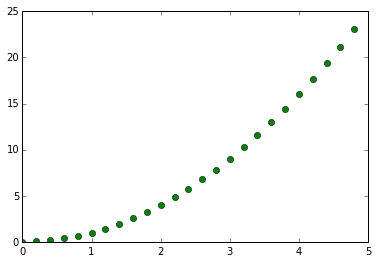

In [51]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, 
          y, 
          markerfacecolor='green', # defines color of the object you're plotting
          marker='o', # specifies a circle. See also s, ^, . , etc.
          markersize=6,
          linestyle='None') # optional format string arg allows plot formatting



Axes also have properties that can be set to snazz up your figure and provide more information, like axes labels and titles.

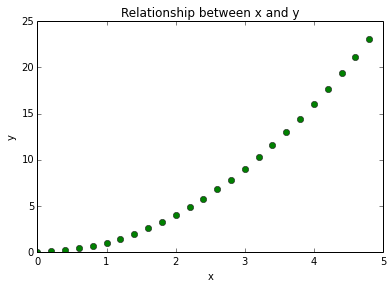

In [52]:
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Relationship between x and y')
fig

Figures can contain more than one set of axes.  This allows us to build subplots and insets.

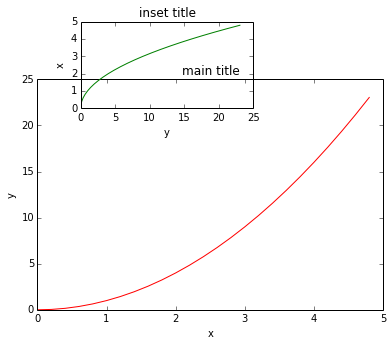

In [56]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.8, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, color='red')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('main title')

# insert
axes2.plot(y, x, color='green')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('inset title');

If we don't care about where our plot axes are placed in the figure, we can let matplotlib manage them with the subplots() method. This is usually how I instantiate a figure and axes objects.  



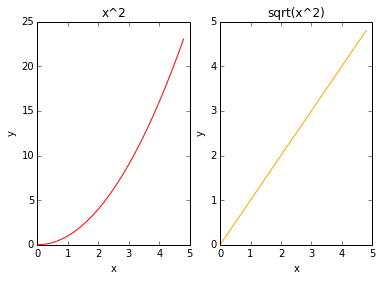

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2)
print axes
line0 = axes[0].plot(x, y, color='red', label='y=x^2')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('x^2')

line1 = axes[1].plot(x, sqrt(y), color='orange', label='y=x')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('sqrt(x^2)')




Or we can put them on the same plot, providing a legend.  The label keyword arg puts the label on the plotted object in the legend.  The legend is created by calling the legend() method on the axis.

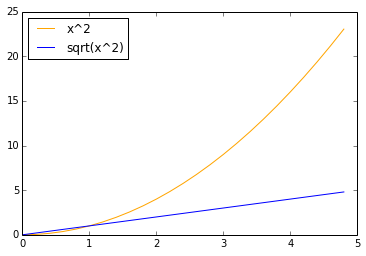

In [61]:
fig, ax = plt.subplots()
line1 = ax.plot(x,y, color='orange', label='x^2')
line2 = ax.plot(x, sqrt(y), color='blue', label='sqrt(x^2)')
ax.legend(loc='best')

As a random aside, I have some methods written up that remove chart junk, and I keep them on my path.  For example, remove_border

In [62]:
def remove_border(ax, axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
    return ax

In [63]:
ax = remove_border(ax) #takes off borders with defaults or as specified
fig

To save a figure to a file we can use the savefig method in the Figure class:



In [64]:
fig.savefig("filename.png")
fig.savefig("filename.png", dpi=200) # specify resolution
fig.savefig("filename.png", transparent=True)

## Making charts from actual data

### Pandas

Pandas is built to use dataframes (similar to R and SQL), and is nicely integrated with numpy, ipython, and matplotlib.  Data frames have columns referenceable by names, rows referencable by index, and can contain a variety of data types as fields.

In [65]:
import pandas as pd

Here I load up some data that I'd dumped in a CSV earlier.  It represents the number of times the 'age group seen' filter is used, per specialty, in PM.  It also has the number of providers configured to see each age group in PMA.

In [72]:
data = pd.read_csv('age_groups_sd.csv')
data.head(5) # head is a great method of the dataframe object to see the first few rows.

expertise      filter  supply  demand
0          Urology  geriatrics       5       2
1          Urology  pediatrics       0      10
2          Urology      adults       5     126
3          Urology   teenagers       0       2
4  Cardiac Surgery  geriatrics       3       0

In [73]:
data.groupby('expertise')['demand'].sum()

expertise
Allergy and Immunology          65
Anesthesiology                  24
Breast Surgery                   5
Cardiac Surgery                  1
Cardiology                      74
Colon and Rectal Surgery         9
Dermatology                    177
Emergency Medicine               1
Endocrinology                  186
Family Medicine                 27
Gastroenterology               219
General Surgery                 38
Hematology                      65
Infectious Diseases             52
Internal Medicine               29
Medical Oncology                19
Nephrology                      72
Neurological Surgery             4
Neurology                      177
Obstetrics & Gynecology        180
Ophthalmology                  145
Orthopedics                    117
Otolaryngology                 112
Pediatrics                      22
Physical Medicine and Rehab      9
Plastic Surgery                 13
Psychiatry                      47
Pulmonology                    109
Rheumatolo

In [74]:
demand_by_exp = sorted(data.groupby('expertise')['demand'].sum(), reverse=True)

fig, ax = plt.subplots()
ax.bar(np.arange(len(demand_by_exp)), demand_by_exp, color='orange',)
ax.set_xticks([])
ax.set_title('Number of times any age filter was used per specialty')
plt.rcParams.update({'font.size': 10})
ax = remove_border(ax)


In [75]:
group_demand_means = data.groupby('expertise').sum()['demand'].reset_index()
group_supply_means = data.groupby('expertise').sum()['supply'].reset_index()
group_supply_means.head()

expertise  supply
0  Allergy and Immunology       6
1          Anesthesiology       4
2          Breast Surgery       7
3         Cardiac Surgery       8
4              Cardiology      31

In [76]:
data = pd.merge(data, group_demand_means, left_on='expertise', right_on='expertise', how='left', suffixes=['','_mean'])
data = pd.merge(data, group_supply_means, left_on='expertise', right_on='expertise', how='left', suffixes=['','_mean'])
data.head()

expertise      filter  supply  demand  demand_mean  supply_mean
0          Urology  geriatrics       5       2          140           10
1          Urology  pediatrics       0      10          140           10
2          Urology      adults       5     126          140           10
3          Urology   teenagers       0       2          140           10
4  Cardiac Surgery  geriatrics       3       0            1            8

We can define new columns based on transformations of the other columns

In [77]:
data['demand_percent'] = 100*data['demand'] / data['demand_mean']
data['supply_percent'] = 100*data['supply'] / data['supply_mean']
data.head()

expertise      filter  supply  demand  demand_mean  supply_mean  \
0          Urology  geriatrics       5       2          140           10   
1          Urology  pediatrics       0      10          140           10   
2          Urology      adults       5     126          140           10   
3          Urology   teenagers       0       2          140           10   
4  Cardiac Surgery  geriatrics       3       0            1            8   

   demand_percent  supply_percent  
0        1.428571            50.0  
1        7.142857             0.0  
2       90.000000            50.0  
3        1.428571             0.0  
4        0.000000            37.5

False precision is a problem.  It's important to get out of the habit.  There are numerous variations of a joke which can be summarized as follows: A tour guide at a museum says a dinosaur skeleton is 100,000,005 years old, because an expert told him that it was 100 million years old when he started working there 5 years ago.

.map() applies a function to all of the values in a column

In [81]:
data['demand_percent'] = data['demand_percent'].map(lambda x: int(round(x)))
data['supply_percent'] = data['supply_percent'].map(lambda x: int(round(x)))
data.head()

expertise      filter  supply  demand  demand_mean  supply_mean  \
0          Urology  geriatrics       5       2          140           10   
1          Urology  pediatrics       0      10          140           10   
2          Urology      adults       5     126          140           10   
3          Urology   teenagers       0       2          140           10   
4  Cardiac Surgery  geriatrics       3       0            1            8   

   demand_percent  supply_percent  
0               1              50  
1               7               0  
2              90              50  
3               1               0  
4               0              38

### Indexing data

One of the magic things about Pandas is the ability to quickly slice and subset based on row characteristics.  For example, here let's find all the rows where the filter is 'geriatrics' or the expertise is 'Hematology

In [83]:
data['expertise']

0              Urology
1              Urology
2              Urology
3              Urology
4      Cardiac Surgery
5      Cardiac Surgery
6      Cardiac Surgery
7      Cardiac Surgery
8     Medical Oncology
9     Medical Oncology
10    Medical Oncology
11    Medical Oncology
12         Orthopedics
13         Orthopedics
14         Orthopedics
...
121                      Neurology
122                      Neurology
123                      Neurology
124    Physical Medicine and Rehab
125    Physical Medicine and Rehab
126    Physical Medicine and Rehab
127    Physical Medicine and Rehab
128                    Dermatology
129                    Dermatology
130                    Dermatology
131                    Dermatology
132                General Surgery
133                General Surgery
134                General Surgery
135                General Surgery
Name: expertise, Length: 136, dtype: object

In [86]:
indices = data['expertise'] == 'Hematology'
print 'There are %s lines with this match' % sum(indices)
print indices
subdf = data[indices]
subdf.head()
print type(subdf)

There are 4 lines with this match
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
Name: expertise, Length: 136, dtype: bool
<class 'pandas.core.frame.DataFrame'>


In [87]:
subdf = data[data['filter'] == 'geriatrics']
subdf.head()

expertise      filter  supply  demand  demand_mean  supply_mean  \
0            Urology  geriatrics       5       2          140           10   
4    Cardiac Surgery  geriatrics       3       0            1            8   
8   Medical Oncology  geriatrics       2       0           19            7   
12       Orthopedics  geriatrics      14       2          117           67   
16  Thoracic Surgery  geriatrics       1       0            8            2   

    demand_percent  supply_percent  
0                1              50  
4                0              38  
8                0              29  
12               2              21  
16               0              50

### Putting pandas indexing, matplotlib graphing, and graph layout together

Filters: ['geriatrics' 'pediatrics' 'adults' 'teenagers']


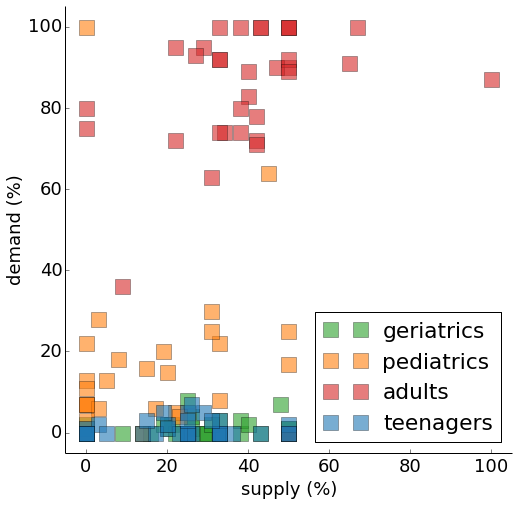

In [88]:
colors = {'pediatrics':'#ff7f0e', 'geriatrics':'#2ca02c', 'adults':'#d62728', 'teenagers':'#1f77b4'} 
fig, ax = plt.subplots(figsize=(8, 8))
filters = data['filter'].unique()
print 'Filters:', filters
for filter_name in filters:
    subdf = data[data['filter'] == filter_name]
    #properties of this specific 
    ax.plot(subdf['supply_percent'], 
            subdf['demand_percent'], 
            color=colors[filter_name],
            marker='s',
            markersize=15,
            alpha=0.6,
            linestyle='none',
            label=filter_name)
    
# properties of the whole axis    
ax.set_xlabel('supply (%)')
ax.set_ylabel('demand (%)')
ax.set_xlim(-5,105)
ax.set_ylim(-5,105)
plt.rcParams.update({'font.size': 18})
ax = remove_border(ax)
plt.legend(loc='best')

### Plotly interactive plots

In [89]:
import plotly.tools as tls
import plotly.plotly as ply
from plotly.graph_objs import Legend, Layout, Figure, XAxis, YAxis
tls.set_credentials_file(username="nicodemus055", 
                             api_key="t4homlufhi")

In [90]:
py_fig2 = tls.mpl_to_plotly(fig, resize=True)

# Delete misplaced legend annotations 
py_fig2['layout'].pop('annotations', None)

# Add legend, place it at the top right corner of the plot
py_fig2['layout'].update(
    showlegend=True,
    legend=Legend(x=1.05, y=1)
    )

# Send updated figure object to Plotly, show result in notebook
ply.iplot(py_fig2, filename='age_filters2')

/Users/dnewman/.virtualenvs/ipython_tutorial/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:382: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/Users/dnewman/.virtualenvs/ipython_tutorial/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:479: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



Still not all of the interactivity we might like.  Which circle correponds to which specialty?  To do this we have to bind more data to each point

In [91]:
# Create 1 data object per point, so every point has its own bindings
chart_data = []
for _, row in data.iterrows():
    t = [ row['expertise'], row['filter']]
    d = {'x': row['supply_percent'],
             'y': row['demand_percent'],
             'marker': {'size': 3*np.sqrt(row['demand']), 
                        'opacity':0.6,
                        'line':{'width':1},
                       'color': colors[row['filter']]},
             'type': 'scatter',
             'mode': 'markers',
             'text': t,
            'name': row['filter']}

    chart_data.append(d)

# Specify lots of details about the appearance of the chart
fig = Figure() 
fig['data'] = chart_data 
fig['layout'] = Layout(showlegend=False,
                       xaxis=XAxis(
                        title='Supply (percent of providers configured)',
                        showgrid=False,
                        zeroline=False
                    ),
                    yaxis=YAxis(
                        title="Demand (percent of age group filter use)",
                        showline=False
                    ),
                    autosize=False,
                    width=550,
                    height=550
                )
ply.iplot(fig, filename='s0')


#APPENDIX

### Basic histogram

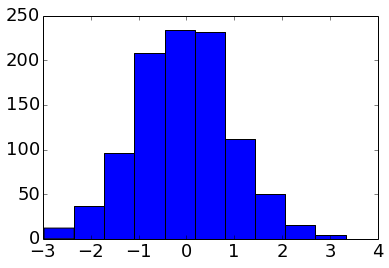

In [92]:
x = np.random.normal(size = 1000)
plt.hist(x)
plt.show()

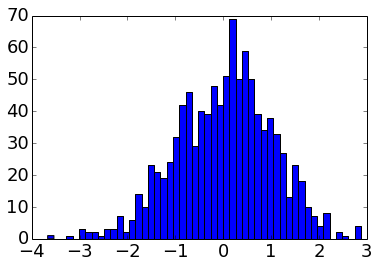

In [93]:
# WITH SPECIFIED NUMBER OF BINS
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.show()

### Animation example

Below is some code for an n-body simulation.

In [94]:
from mpl_toolkits.mplot3d import Axes3D

In [95]:
# FUNCTIONS FOR APPROXIMATING N-BODY FORCE AND N-BODY ENERGY
GRAVITATIONAL_CONSTANT = 6.674*10**(-11)

def nbodyforce(mass,position):
    numBodies = len(mass)
    forceArray = np.zeros((numBodies, 3))
    for i in range(numBodies):
        for j in range(numBodies):
            if i <> j:
                r = position[j] - position[i]
                forceArray[i] += (mass[i]*mass[j]/np.linalg.norm(r)**3)*r
        forceArray[i] *= GRAVITATIONAL_CONSTANT
    return forceArray

def nbodyenergy(mass, position, velocity, print_energies = False):
    numBodies = len(mass)
    U = 0.0
    T = 0.0
    for i in range(numBodies-1):
        for j in range(i+1,numBodies):
            r = position[j] - position[i]
            U += mass[i]*mass[j]/np.linalg.norm(r)
    U = (-1)*GRAVITATIONAL_CONSTANT*U
    for i in range(numBodies):
        T += mass[i]*np.linalg.norm(velocity[i])**2
    T = 0.5*T
    if print_energies == True:
        print "U,T,U+T:",U,T,(U+T)
    return U+T

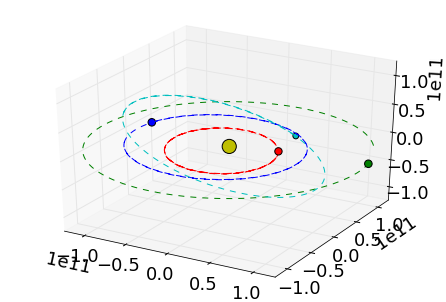

In [96]:
from IPython import display
# read in strings from file and convert values to floats and then put
# them into numpy array
num_bodies = 5
text_file = open("System-Q4.txt", "r")
lines = text_file.readlines()
systemInfo = []
for i in range(num_bodies):
    #read in strings from file and convert values to floats
    mass,xpos,ypos,zpos,xvel,yvel,zvel = map(float, lines[i+1].split(","))
    systemInfo.append([mass,xpos,ypos,zpos,xvel,yvel,zvel])
systemInfo = np.array(systemInfo)

#extract mass, positon and velocity into separate arrays
massArray = systemInfo[:,0]
positionArray_0 = systemInfo[:,1:4]
velocityArray_0 = systemInfo[:,4:7]

h = 4 * 10**3
t_final = 3 * 10**7
positionArray = np.zeros((1,num_bodies,3))


for i in range(num_bodies):
    positionArray[0][i] = positionArray_0[i]

energyArray = np.zeros(int(t_final/h))
energyArray[0] = nbodyenergy(massArray,positionArray_0,velocityArray_0)

acceleration = np.zeros((num_bodies,3))
velocityArray = velocityArray_0

fig = plt.figure()
ax = Axes3D(fig)
colorArray = ['y','r','b','g','c']

for i in range(1, int(t_final/h)):
    forces = nbodyforce(massArray,positionArray[i-1])
    for j in range(num_bodies):
        acceleration[j] = forces[j]/massArray[j]
        velocityArray[j] = velocityArray[j] + acceleration[j]*h
    positionArray = np.vstack((positionArray,np.zeros((1,num_bodies,3))))
    positionArray[i] = positionArray[i-1] + velocityArray*h
    energyArray[i] = nbodyenergy(massArray,positionArray[i],velocityArray)
    
    #plot at intervals of 100
    if i % 100 == 0:
        plt.clf()
        ax = Axes3D(fig)
        pltArray = []
        for j in range(num_bodies):
            size = np.log(massArray[j])
            if j == 0:
                size = 200
            positionArrayIndividual = positionArray[:,j]
            pltArray.append(ax.scatter(positionArrayIndividual[:,0][i], 
                positionArrayIndividual[:,1][i], 
                positionArrayIndividual[:,2][i],s=size, 
                c=colorArray[j],label="Planet " + str(j+1)))
            ax.plot(positionArrayIndividual[:,0], 
                positionArrayIndividual[:,1], 
                positionArrayIndividual[:,2],"--",
                c=colorArray[j],label="Planet " + str(j+1))

        ax.set_xlim(-1.2*10**11,1.2*10**11)
        ax.set_ylim(-1.2*10**11,1.2*10**11)
        ax.set_zlim(-1.2*10**11,1.2*10**11)
        display.clear_output(wait=True)
        display.display(plt.gcf())

plt.close()

### Heatmap with 2D histogram and 2D scatterplot overlayed

In [97]:
def P(x1,x2):
    a = 0.1
    b = 1
    return np.exp((-1./(2*(a**2)))*((x1**2+x2**2)**0.5-1)**2-(1./(2*(b**2)))*((x2-1)**2))

def q(mean,gamma):
    return np.random.normal(mean,gamma)

def MH_multivariate(p,q,n,gamma):
    # start from a random position 
    np.random.seed(seed=10)
    x0=0
    y0=0
    x_prev =x0
    y_prev =y0
    
    x = np.zeros(n)
    y = np.zeros(n)
    i=0
    accepted = 0
    
    while i<n:
        x_star =  q(x_prev,gamma) 
        P_star = p(x_star,y_prev)
        P_prev = p(x_prev, y_prev)
        A =  P_star/P_prev 
        U = np.random.uniform();
        
        if (U < A):
            x[i] = x_star
            i = i + 1
            x_prev = x_star
            accepted+=1
        else: 
            x[i] = x_prev
            x_prev = x[i]
            i = i + 1
        
        i=i-1
        # now lets do the y step 
        y_star =   q(y_prev,gamma)
        
        P_star = p(x_prev,y_star)
        P_prev = p(x_prev, y_prev)
        A =  P_star/P_prev
        
        U = np.random.uniform()
         
        if U < A:
            y[i] = y_star
            i = i + 1
            y_prev = y_star
            accepted+=1
        else: 
            y[i] = y_prev
            y_prev = y[i];  
            i = i + 1
            
    acceptance_rate = accepted/float(n*2)
    return acceptance_rate, x, y

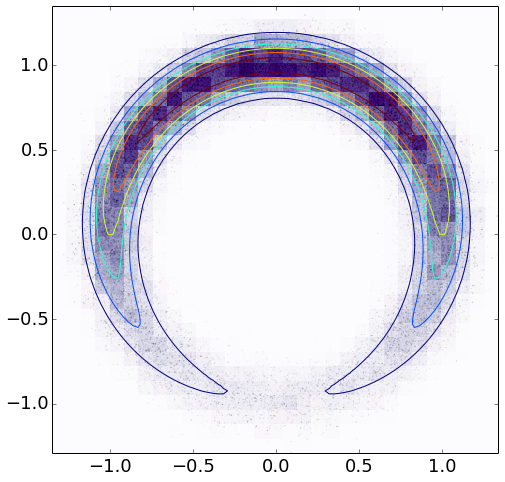

In [98]:
acceptance_rate_gamma1, x, y = MH_multivariate(P,q,100000,1.0)

plt.figure(figsize=[8,8])
counts,xd,yd,fig=plt.hist2d(x,y,31, cmap="Purples");
xt,yt = np.meshgrid(np.linspace(-1.5,1.5, 100),np.linspace(-1.5,1.5,100))
plt.contour(xt,yt, P(xt,yt))
plt.scatter(x,y, 0.1, alpha=0.05, cmap="BuGn")
plt.show()